In [1]:
T = [ 1, 2, 3 ]

In [2]:
def permuter1(S,n):
    if n == 1:
        print(S)
    else:
        for i in range(0,n):
            permuter1(S,n-1)
            S[i],S[n-1] = S[n-1],S[i]

In [3]:
permuter1(T.copy(),len(T))

[1, 2, 3]
[2, 1, 3]
[3, 1, 2]
[1, 3, 2]
[1, 2, 3]
[2, 1, 3]


In [4]:
def permuter2(S,n):
    if n == 1:
        print(S)
    else:
        for i in range(0,n):
            permuter2(S.copy(),n-1)
            S[i],S[n-1] = S[n-1],S[i]

In [5]:
permuter2(T.copy(),len(T))

[1, 2, 3]
[2, 1, 3]
[3, 2, 1]
[2, 3, 1]
[3, 1, 2]
[1, 3, 2]


In [6]:
def permuter3(S,n):
    if n == 1:
        print(S)
    else:
        for i in range(0,n):
            S[i],S[n-1] = S[n-1],S[i]
            permuter3(S,n-1)
            S[i],S[n-1] = S[n-1],S[i]

In [7]:
permuter3(T.copy(),len(T))

[2, 3, 1]
[3, 2, 1]
[3, 1, 2]
[1, 3, 2]
[2, 1, 3]
[1, 2, 3]


In [8]:
def permuter3c(S,n):
    cnt = 0
    if n == 1:
        pass
    else:
        for i in range(0,n):
            S[i],S[n-1] = S[n-1],S[i]
            cnt += permuter3c(S.copy(),n-1) + 2
            S[i],S[n-1] = S[n-1],S[i]
    return cnt

In [9]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def grapheComplexite(func,N,title):
    X = range(2,N)
    XF = [ np.math.factorial(x) for x in X ]

    C = []
    for n in X:
        TAB = np.random.uniform(0,1,n)
        C.append(func(TAB,n))

    plt.semilogy(X,C,label=title)
    plt.semilogy(X,XF,label='n!')
    plt.legend()
    plt.title('Complexité')
    plt.show()

    i = len(X)-1
    print('Echanges pour {0} éléments: {1}'.format(X[i],C[i]))
    print('Factorielle({0}) :          {1}'.format(X[i],XF[i]))
    print('Rapport C({0})/({0}!-1):      {1}'.format(X[i],C[i]/(XF[i]-1)))

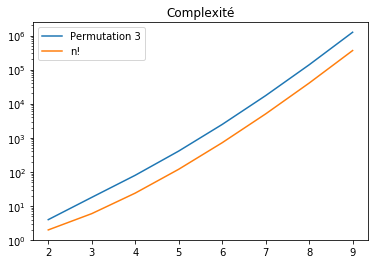

Echanges pour 9 éléments: 1247058
Factorielle(9) :          362880
Rapport C(9)/(9!-1):      3.4365670099399526


In [10]:
grapheComplexite(permuter3c,10,'Permutation 3')

In [11]:
def permuter4(S,n):
    if n == 1:
        print(S)
    else:
        for i in range(0,n-1):
            S[i],S[n-1] = S[n-1],S[i]
            permuter4(S,n-1) 
            S[i],S[n-1] = S[n-1],S[i]
        permuter4(S,n-1)

In [12]:
permuter4(T.copy(),len(T))

[2, 3, 1]
[3, 2, 1]
[3, 1, 2]
[1, 3, 2]
[2, 1, 3]
[1, 2, 3]


In [13]:
def permuter4c(S,n):
    cnt = 0
    if n == 1:
        pass
    else:
        for i in range(0,n-1):
            S[i],S[n-1] = S[n-1],S[i]
            cnt += permuter4c(S,n-1) + 2
            S[i],S[n-1] = S[n-1],S[i]
        cnt += permuter4c(S,n-1)
    return cnt

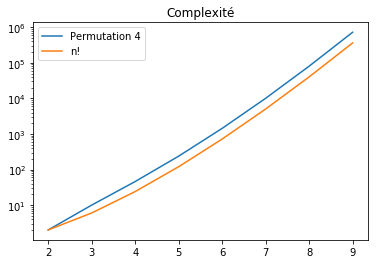

Echanges pour 9 éléments: 725758
Factorielle(9) :          362880
Rapport C(9)/(9!-1):      2.0


In [14]:
grapheComplexite(permuter4c,10,'Permutation 4')

In [15]:
def permuterHeap(S,n):
    if n == 1:
        print(S)
    else:
        permuterHeap(S,n-1)
        for i in range(0,n-1):
            if n % 2 == 0:
                S[i],S[n-1] = S[n-1],S[i]
            else:
                S[1],S[n-1] = S[n-1],S[1]
            permuterHeap(S,n-1)

In [16]:
permuterHeap(T.copy(),len(T))

[1, 2, 3]
[2, 1, 3]
[2, 3, 1]
[3, 2, 1]
[3, 1, 2]
[1, 3, 2]


In [17]:
def permuterHeapC(S,n):
    cnt = 0
    if n == 1:
        pass
    else:
        cnt += permuterHeapC(S,n-1)
        for i in range(0,n-1):
            if n % 2 == 0:
                S[i],S[n-1] = S[n-1],S[i]
            else:
                S[1],S[n-1] = S[n-1],S[1]
            cnt += permuterHeapC(S,n-1) + 1
    return cnt

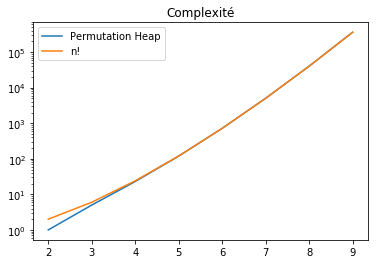

Echanges pour 9 éléments: 362879
Factorielle(9) :          362880
Rapport C(9)/(9!-1):      1.0


In [18]:
grapheComplexite(permuterHeapC,10,'Permutation Heap')